In [2]:
from sklearn import datasets, model_selection, svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib
import numpy as np
import pandas as pd
import threading
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp

C:\Users\Yooru\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
##Prepare data##

filename=r'drone_delivery.csv'
data_train=pd.read_csv(filename,index_col=None,na_values='?',sep = ';')
data_train=data_train.drop(['clientid'], axis=1)
data_train=data_train.dropna()
colnames = data_train.columns.get_values()
print(colnames)
print(data_train.head(10))

print("\nDESCRIBE DATA:\n",data_train.describe())
data_train.describe().to_excel(r'original_Describe.xlsx')

X=data_train['x']
y=data_train['y']
print(data_train.shape)
print(y.shape)

['x' 'y']
            x           y
0  622.771572  164.857623
1  416.357298  630.193634
2  292.735020  567.333231
3  737.211288  166.225676
4  540.475375  682.912298
5  535.469492  318.439661
6  640.380050  870.833221
7  235.772075  359.048203
8  481.896884  661.491838
9  730.032789  312.177817

DESCRIBE DATA:
                  x            y
count  5956.000000  5956.000000
mean    508.823177   427.554772
std     271.061462   289.044640
min       0.017692     0.043285
25%     282.582920   170.079921
50%     518.100892   397.786441
75%     727.156497   669.982518
max     999.533215   999.731720
(5956, 2)
(5956,)


C:\Users\Yooru\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  import sys


In [4]:
   # Finalize and render the figure


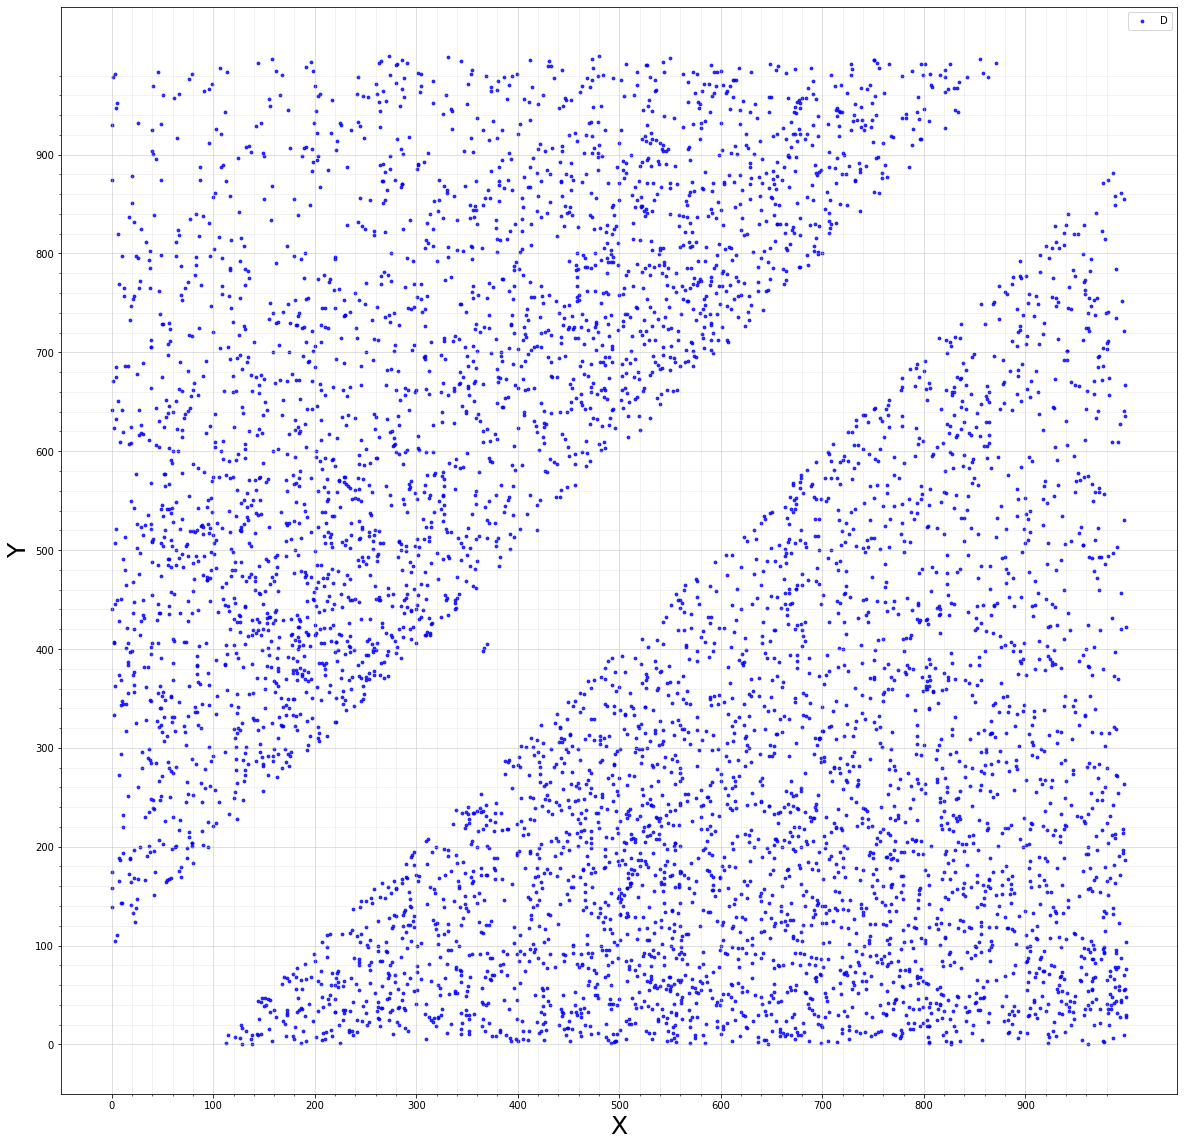

In [5]:
###SCATTER XY####

ax=data_train.plot(kind="scatter", x="x", y="y",
    s=8,
    c="blue", alpha=0.8, figsize=(20,20),
)


##Initializing grid
major_ticks = np.arange(0, 1000, 100)
minor_ticks = np.arange(0, 1000, 20)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.grid(True)
plt.ylabel("Y", fontsize=25)
plt.xlabel("X", fontsize=25)
plt.legend("Drone XYlllll")
plt.show()

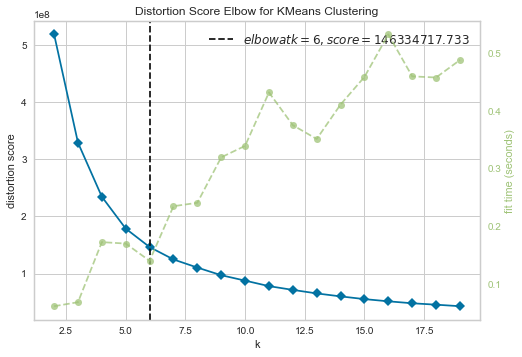

In [6]:
###Elbow method###
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(data_train)        # Fit the data to the visualizer
visualizer.show()   

In [14]:
###Making model####
trainSet = data_train

###K-Means clustering###FIT AND PREDICT
from sklearn import cluster
num_clusters = 4
print(data_train.shape)
for i in range (num_clusters):
    print(data_train.shape)
    centroids_df={}
    centroidHelper=data_train
    kmeans = cluster.KMeans(n_clusters=num_clusters,random_state=1,max_iter=1000)
    kmeans.fit(data_train)
    predict=kmeans.predict(data_train)



    centroids = kmeans.cluster_centers_

# create a pandas data frame with columns
   # centroids_df = pd.DataFrame(centroids, columns=colnames)
    #print('\nCLUSTER CENTROIDS:\n',centroids_df)
    #centroids_df.to_excel(r'centroids.xlsx')
    
    filename=str(i),"OriginalData_Clusters_included"
    ###Adding cluster info to original data
centroidHelper['Cluster'] = pd.DataFrame(predict, index=centroidHelper.index)
   # data_train.to_excel(r'c', centroids = kmeans.cluster_centers_)
print('\nORIGINAL DATA WITH CLUSTER INDEX:\n',data_train.head(10))
    
print(centroids)   
    
# create a pandas data frame with columns
centroids_df = pd.DataFrame(centroids, columns=colnames)
print('\nCLUSTER CENTROIDS:\n',centroids_df)
centroids_df.to_excel(r'centroids.xlsx')
        

    


(5956, 2)
(5956, 2)
(5956, 2)
(5956, 2)
(5956, 2)

ORIGINAL DATA WITH CLUSTER INDEX:
             x           y  Cluster
0  622.771572  164.857623        3
1  416.357298  630.193634        2
2  292.735020  567.333231        0
3  737.211288  166.225676        1
4  540.475375  682.912298        2
5  535.469492  318.439661        3
6  640.380050  870.833221        2
7  235.772075  359.048203        0
8  481.896884  661.491838        2
9  730.032789  312.177817        1
[[172.08394272 530.08888692]
 [800.50834936 249.70911636]
 [593.67525207 792.80235248]
 [439.66767626 140.24398915]]

CLUSTER CENTROIDS:
             x           y
0  172.083943  530.088887
1  800.508349  249.709116
2  593.675252  792.802352
3  439.667676  140.243989


In [8]:
###FOR LATER USE###
###Cluster item count###
print("CLUSTER ITEM COUNT:")
print("Cluster 0 =",np.sum(predict==0))
print("Cluster 1 =",np.sum(predict==1))
print("Cluster 2 =",np.sum(predict==2))
print("Cluster 3 =",np.sum(predict==3))
print("Cluster 4 =",np.sum(predict==4))
print("Cluster 5 =",np.sum(predict==5))
print("Cluster 6 =",np.sum(predict==6))
print("Cluster 7 =",np.sum(predict==7))

CLUSTER ITEM COUNT:
Cluster 0 = 1513
Cluster 1 = 1649
Cluster 2 = 1442
Cluster 3 = 1352
Cluster 4 = 0
Cluster 5 = 0
Cluster 6 = 0
Cluster 7 = 0


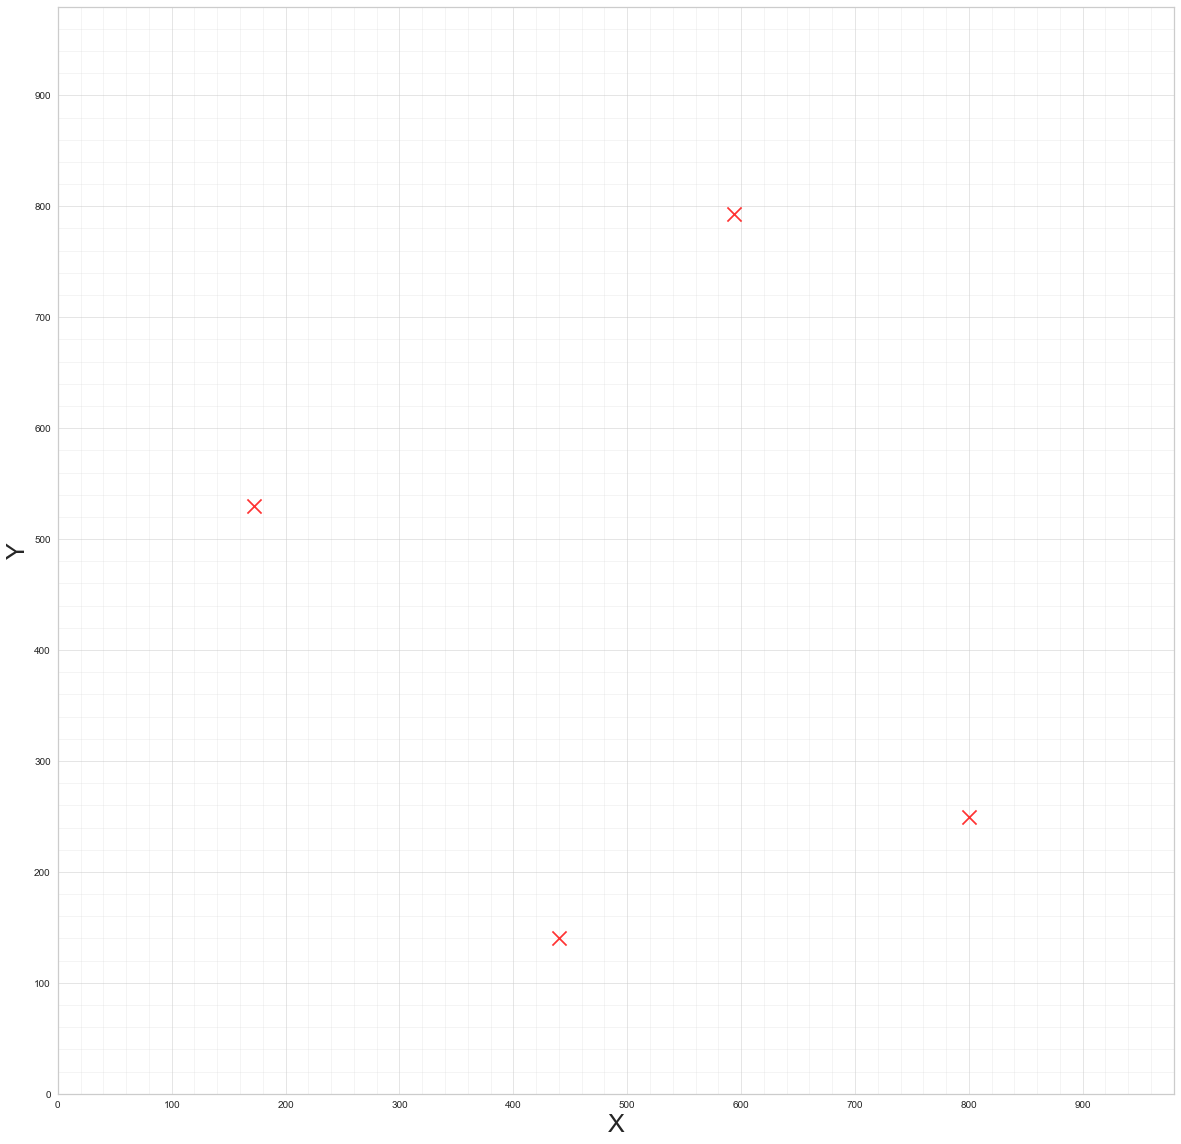

In [15]:
###SCATTER XY Cluster centers#### NOT IMPLEMENTED

ax=centroids_df.plot(kind="scatter", x="x", y="y",
    s=200,
    c="red", alpha=0.8, figsize=(20,20),marker="x"
)


##Initializing grid
major_ticks = np.arange(0, 1000, 100)
minor_ticks = np.arange(0, 1000, 20)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.grid(True)
plt.ylabel("Y", fontsize=25)
plt.xlabel("X", fontsize=25)
#plt.legend("Drone XYlllll")
plt.show()

In [ ]:

label = [0,1,2,3,0,1,2,3]
colors = ['red','green','blue','purple']

fig = plt.figure(figsize=(8,8))
plt.scatter(X, y, c=label, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)